In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from IPython.display import display


[nltk_data] Downloading package punkt to /Users/elliotyip/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elliotyip/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('/Users/elliotyip/Desktop/Portfolio-project/Project-05/US-Accidents-final.csv')


In [5]:
display(df.shape)
display(df.columns)
display(df.dtypes)

(7503872, 35)

Index(['ID', 'Severity', 'month', 'Start_Time', 'Start_Lat', 'Start_Lng',
       'Description', 'City', 'County', 'State', 'Country', 'Timezone',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Day_Night'],
      dtype='object')

ID                    object
Severity               int64
month                 object
Start_Time            object
Start_Lat            float64
Start_Lng            float64
Description           object
City                  object
County                object
State                 object
Country               object
Timezone              object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
Day_Night     

In [6]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])


 #### Accidents counts over time

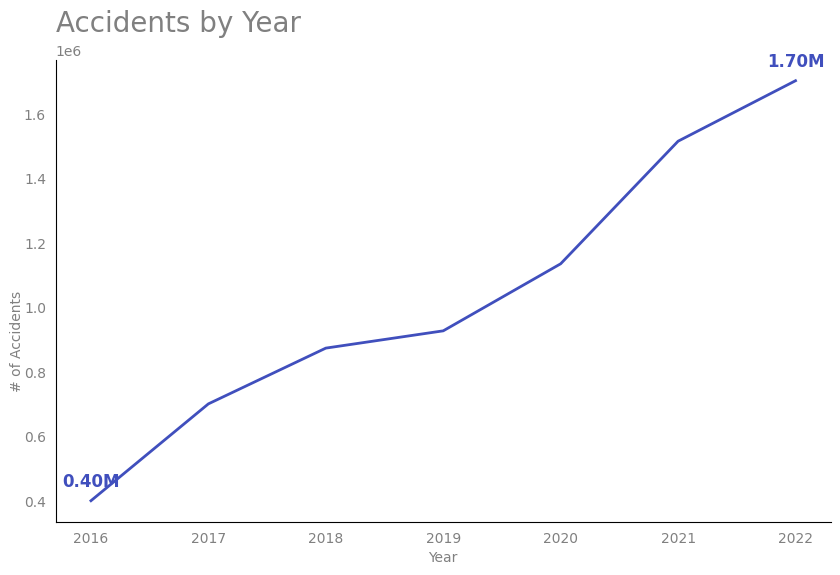

In [7]:
accidents_by_year = df[df['Start_Time'].dt.year != 2023]['Start_Time'].dt.year.value_counts().sort_index().reset_index()
accidents_by_year.columns = ['Year', 'Accident Count']

plt.figure(figsize=(10, 6))
sns.lineplot(data=accidents_by_year, x='Year', y='Accident Count', linewidth=2, color='#404fbd')  # Change line color to grey
plt.xlabel('Year', color='grey')  # Change x-axis label color to grey
plt.ylabel('# of Accidents', labelpad=10, ha='right', va='top', color='grey')  # Change y-axis label color to grey
plt.title('Accidents by Year', loc='left', pad=20, color='grey', fontsize=20)  # Change title color to grey

# Annotating data points with values for 2016 and 2022
for i, row in accidents_by_year.iterrows():
    if row['Year'] in [2016, 2022]:
        plt.annotate(f'{row["Accident Count"]/1000000:.2f}M', (row['Year'], row['Accident Count']),
                     textcoords="offset points", xytext=(0, 10), ha='center', color='#404fbd', fontsize=12, weight='bold')  # Change annotation text color to black

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, color='grey', labelcolor='grey')  # Change x-axis tick color to grey
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True, color='grey', labelcolor='grey')  # Change y-axis tick color to grey
plt.grid(False)

# Remove border
sns.despine()

plt.show()



 #### Accidents counts and percentage by State

In [8]:
import plotly.express as px

# Assuming 'State' is the column representing the states
state_counts = df['State'].value_counts()
state_percentages = round(state_counts / len(df['State']) * 100, 2)

# Create a DataFrame with both count and percentage
state_distribution = pd.concat([state_counts, state_percentages], axis=1, keys=['Count', 'Percentage(%)'])

fig = px.choropleth(locations=state_distribution.index, 
                    locationmode="USA-states",
                    color=state_distribution['Percentage(%)'],
                    hover_name=state_distribution.index,
                    color_continuous_scale="Viridis",
                    title="State Distribution",
                    labels={'color': 'Percentage(%)'})

fig.update_geos(scope="usa")
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()
print(state_distribution.head())
print()
print(f'California, Florida and Texas accounts for {round(state_distribution.iloc[:3, 1].sum(), 2)}% of total accidents in the United States')

         Count  Percentage(%)
State                        
CA     1668895          22.24
FL      861500          11.48
TX      571429           7.62
SC      375375           5.00
NY      343147           4.57

California, Florida and Texas accounts for 41.34% of total accidents in the United States


 FL, CA and TX stood out for having the highest percentage of accidents nationwide.

 #### Accidents ratio between day and night

In [9]:
day_night_counts = df['Day_Night'].value_counts()
day_night_percentages = round(day_night_counts / len(df['Day_Night']) * 100, 2)

# Create a DataFrame with both count and percentage
day_night_distribution = pd.concat([day_night_counts, day_night_percentages], axis=1, keys=['Count', 'Percentage(%)'])

# Display the result
print(day_night_distribution)


             Count  Percentage(%)
Day_Night                        
Day        5204090          69.35
Night      2299782          30.65


 #### Accidents counts by hours of day

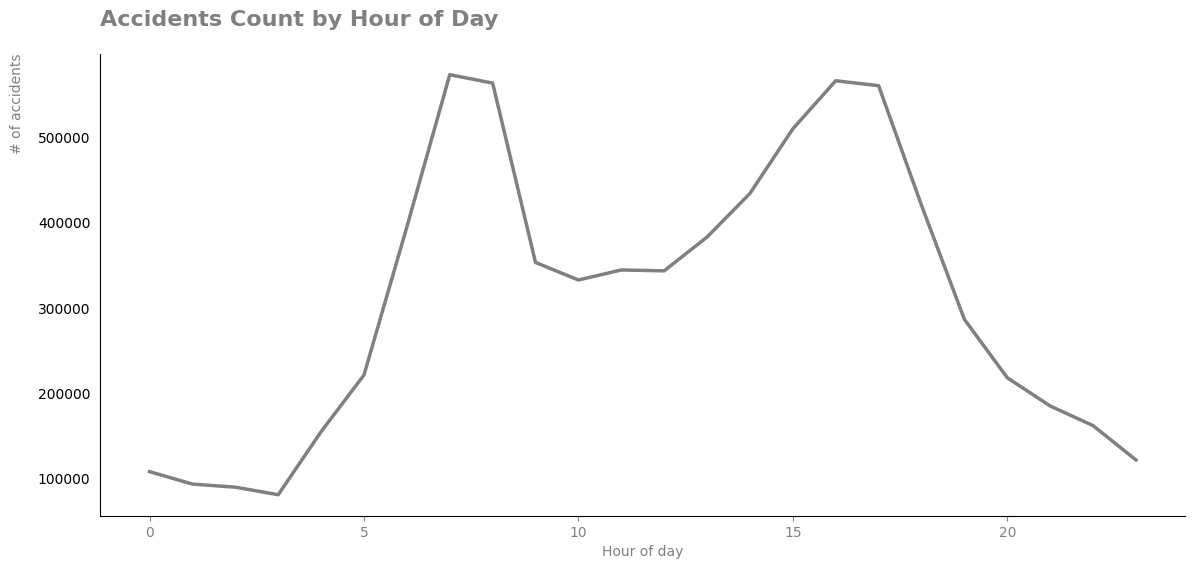

In [10]:
crash_hour = df['Start_Time'].dt.hour.value_counts().sort_index()
fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(x=crash_hour.index, y=crash_hour.values, color='grey', linewidth=2.5, ax=ax)

ax.set_xlabel('Hour of day', color='grey')
ax.set_ylabel('# of accidents', labelpad=10, loc='top', color='grey')
ax.set_title('Accidents Count by Hour of Day', loc='left', pad=20, color='grey', fontsize=16, fontweight='bold')

ax.tick_params(axis='x', which='both', color='grey', labelcolor='grey')
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=True, color='grey')
ax.grid(False)
sns.despine()

plt.show()

It seems like accidents occur the most during working hours between 0600 - 0800 and between 1600, 1700.
Let's explore further to find out is there a difference in distribution between weekday vs weekend accidents.

 #### Average weekday vs weekend accidents by hour

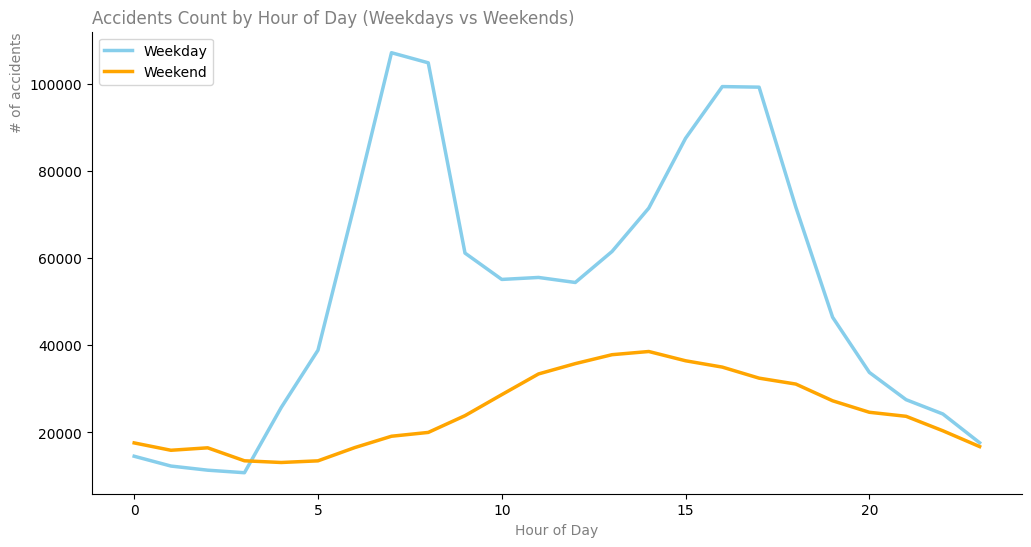

In [11]:
weekday_df = df[df['Start_Time'].dt.dayofweek.isin([0, 1, 2, 3, 4])]
weekday_crashes = weekday_df['Start_Time'].dt.hour.value_counts()
weekday_average = weekday_crashes / 5  # Average accidents count to daily

weekend_df = df[df['Start_Time'].dt.dayofweek.isin([5, 6])]
weekend_crashes = weekend_df['Start_Time'].dt.hour.value_counts()
weekend_average = weekend_crashes / 2  # Average accidents count to daily

index = weekday_average.index

weekday_average = weekday_average.reindex(index)
weekend_average = weekend_average.reindex(index)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=index, y=weekday_average.values, label='Weekday', color='skyblue', linewidth=2.5, ax=ax)
sns.lineplot(x=index, y=weekend_average.values, label='Weekend', color='orange', linewidth=2.5, ax=ax)

ax.set_xlabel('Hour of Day', color='grey')
ax.set_ylabel('# of accidents', color='grey', loc='top')
ax.set_title('Accidents Count by Hour of Day (Weekdays vs Weekends)', color='grey', loc='left')

ax.legend(loc='upper left')
sns.despine()
plt.show()

By comparing accidents of weekdays to weekend, we see that the distribution is very different. Accidents on weekends peak during mid-day between 1200 to 1500, whereas weekday accidents peak during rush hours at 0600 and 1700.

 #### Ratio between average weekday / weekend accidents by hour

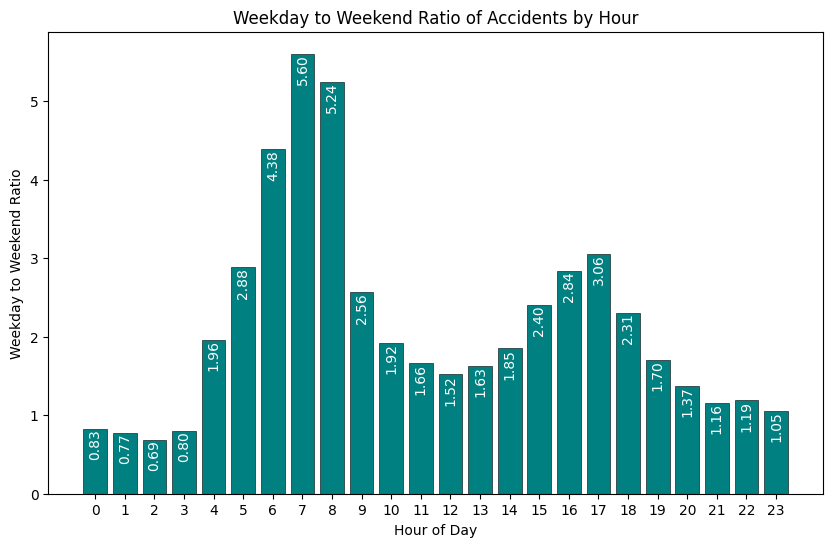

In [12]:
weekday_to_weekend_ratio = weekday_average / weekend_average
accident_ratio_by_hour = {hour: ratio for hour, ratio in zip(weekday_to_weekend_ratio.index, weekday_to_weekend_ratio.values)}

# Plot the weekday to weekend ratio by hour
plt.figure(figsize=(10, 6))
bars = plt.bar(list(accident_ratio_by_hour.keys()), list(accident_ratio_by_hour.values()), color='teal', edgecolor='black', linewidth=0.4)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}',ha='center', va='top', rotation=90, color='#ffffff')

plt.xlabel('Hour of Day')
plt.ylabel('Weekday to Weekend Ratio')
plt.title('Weekday to Weekend Ratio of Accidents by Hour')
plt.xticks(weekday_average.index)
plt.show()



 Rush hours accidents during the weekdays is up to 5 times more likely than on weekend. Generally speaking, on average, accident is more prone to happen during weekdays than weekends, except during 0000 to 0400.

 #### Nearby landmarks during accident

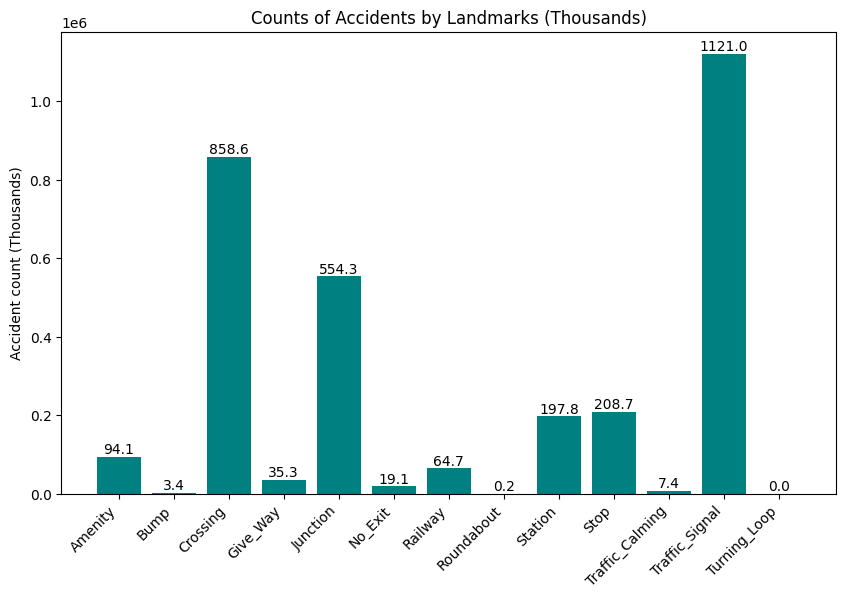

In [13]:
# List of columns with boolean values
landmark_type = [
    'Amenity',
    'Bump',
    'Crossing',
    'Give_Way',
    'Junction', 
    'No_Exit', 
    'Railway', 
    'Roundabout', 
    'Station', 
    'Stop',
    'Traffic_Calming', 
    'Traffic_Signal', 
    'Turning_Loop'
]

counts = [df[x].sum(axis=0) for x in landmark_type]
counts

plt.figure(figsize=(10, 6))
bars = plt.bar(landmark_type, counts, color='teal')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accident count (Thousands)')
plt.title('Counts of Accidents by Landmarks (Thousands)')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{count/1000:.1f}', ha='center', va='bottom')

plt.show()


By breaking down accidents based on nearby landmarks, it allows us to identify accident hotspots and prioritise these locations for the authority to take action. From the visualisation above it is clear that the top 5 accidents hotspots are - in descending order - areas with traffic signal, crossing, junction, stop sign and station.

#### Identifying Cities vs Freeway accidents using description keywords 
and 
#### Finding the accidents distribution between Cities / Freeway by Landmarks

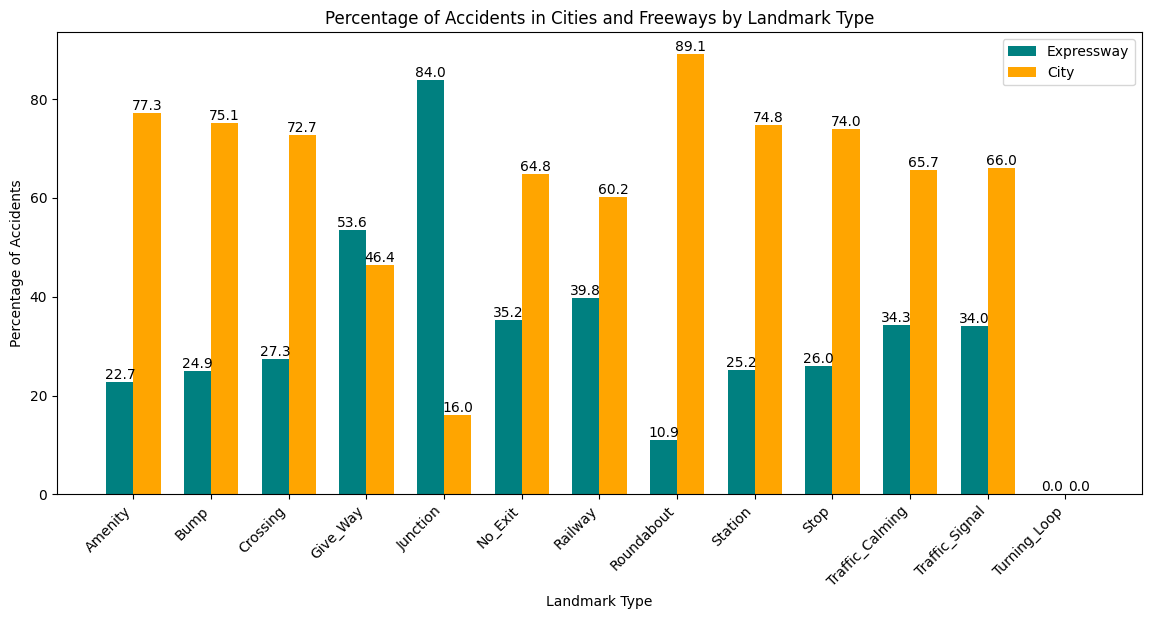

In [14]:
landmark_type = [
    'Amenity',
    'Bump',
    'Crossing',
    'Give_Way',
    'Junction',
    'No_Exit',
    'Railway',
    'Roundabout',
    'Station',
    'Stop',
    'Traffic_Calming',
    'Traffic_Signal',
    'Turning_Loop'
]

accident_expressway_dict = {}
accident_city_dict = {}

for x in landmark_type:
    accident_expressway = df[(df[x] == True) & df['Description'].astype(str).str.contains('westbound|eastbound|northbound|southbound|wb|eb|nb|sb|hwy|fwy|expy|exit|exits', case=False)]['Description']
    accident_expressway_dict[x] = accident_expressway

    accident_city = df[(df[x] == True) & df['Description'].astype(str).str.contains('st|row|ave|blvd|road|rd|ln|dr|way|pkwy|pky', case=False) & ~df.index.isin(accident_expressway.index)]['Description']
    accident_city_dict[x] = accident_city

total_accidents = [len(accident_city_dict[x]) + len(accident_expressway_dict[x]) for x in landmark_type]

percentages_expressway = [len(accident_expressway_dict[x]) / total * 100 if total != 0 else 0 for x, total in zip(landmark_type, total_accidents)]
percentages_city = [len(accident_city_dict[x]) / total * 100 if total != 0 else 0 for x, total in zip(landmark_type, total_accidents)]

bar_width = 0.35
index = np.arange(len(landmark_type))
fig, ax = plt.subplots(figsize=(14, 6))

bar1 = ax.bar(index, percentages_expressway, bar_width, label='Expressway', color='teal')
bar2 = ax.bar(index + bar_width, percentages_city, bar_width, label='City', color='orange')

for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', rotation=0)

# Add data labels for weekend crashes
for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', rotation=0)

ax.set_xlabel('Landmark Type')
ax.set_ylabel('Percentage of Accidents')
ax.set_title('Percentage of Accidents in Cities and Freeways by Landmark Type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(landmark_type, rotation=45, ha='right')
ax.legend()

plt.show()

### All highway and cities accidents.

In [15]:

all_accidents_highway = df[df['Description'].astype(str).str.contains('westbound|eastbound|northbound|southbound|wb|eb|nb|sb|hwy|fwy|expy|exit|exits', case=False)]
highway_accidents = all_accidents_highway.index

all_accidents_city = df[df['Description'].astype(str).str.contains('st|row|ave|blvd|road|rd|ln|dr|way|pkwy|pky', case=False) & ~df.index.isin(highway_accidents)]
city_accidents = all_accidents_city.index


In [16]:
print(f'Number of accidents on highway: {len(highway_accidents)} ({round(len(highway_accidents)/(len(highway_accidents)+len(city_accidents))*100, 2)}%)')
print(f'Number of accidents in city: {len(city_accidents)} ({round(len(city_accidents)/(len(highway_accidents)+len(city_accidents))*100, 2)}%)')

Number of accidents on highway: 4272585 (58.43%)
Number of accidents in city: 3040129 (41.57%)


NOTE: The keywords used to segregate between cities and highway accidents are not exhaustive and may capture accidents happened on a freeway but is in between two cities or vice versa. Hence, the keywords used might categorise our data point as a city/highway accident even when they are not.

There is a stark difference between cities and highways percentages for accidents happened near junctions. More than 80 percent of junction accidents took place on highway. This could be due to traffic speed.

Accidents happened near roundabouts accounts for almost 90 percent of all accidents in the city. That does not come as a surprise because roundabouts aren't common on freeways.

There are data points for traffic signal and pedestrian crossings in the highway data frame, which is not intuitive. It is advised to analyse deeper into these data points to identify whether the segregation is accurate.

Accidents happens more often on highway than cities. The number may change depending on the keywords used to segregate the dataset.

### Rush hour and non-rush hour dataset for City and Highway

In [17]:
accident_expressway_rush_hour = all_accidents_highway[all_accidents_highway['Start_Time'].dt.hour.isin([6, 7, 8, 9, 15, 16, 17, 18])]
accident_city_rush_hour = all_accidents_city[all_accidents_city['Start_Time'].dt.hour.isin([6, 7, 8, 9, 15, 16, 17, 18])]

accident_expressway_non_rush_hour = all_accidents_highway[~all_accidents_highway['Start_Time'].dt.hour.isin([6, 7, 8, 9, 15, 16, 17, 18])]
accident_city_non_rush_hour = all_accidents_city[~all_accidents_city['Start_Time'].dt.hour.isin([6, 7, 8, 9, 15, 16, 17, 18])]

In [33]:
print(f'Combined number of accidents during rush hours: {len(accident_expressway_rush_hour)+len(accident_city_rush_hour)}')
print(f'Combined number of accidents during non-rush hours: {len(accident_expressway_non_rush_hour)+len(accident_city_non_rush_hour)}')
print("")
print('The total number of accidents during rush hour period is greater than the number of accidents than the rest of the day combined.')

Combined number of accidents during rush hours: 3848227
Combined number of accidents during non-rush hours: 3464487

The total number of accidents during rush hour period is greater than the number of accidents than the rest of the day combined.


### Top accident hotspot during rush hour on weekdays

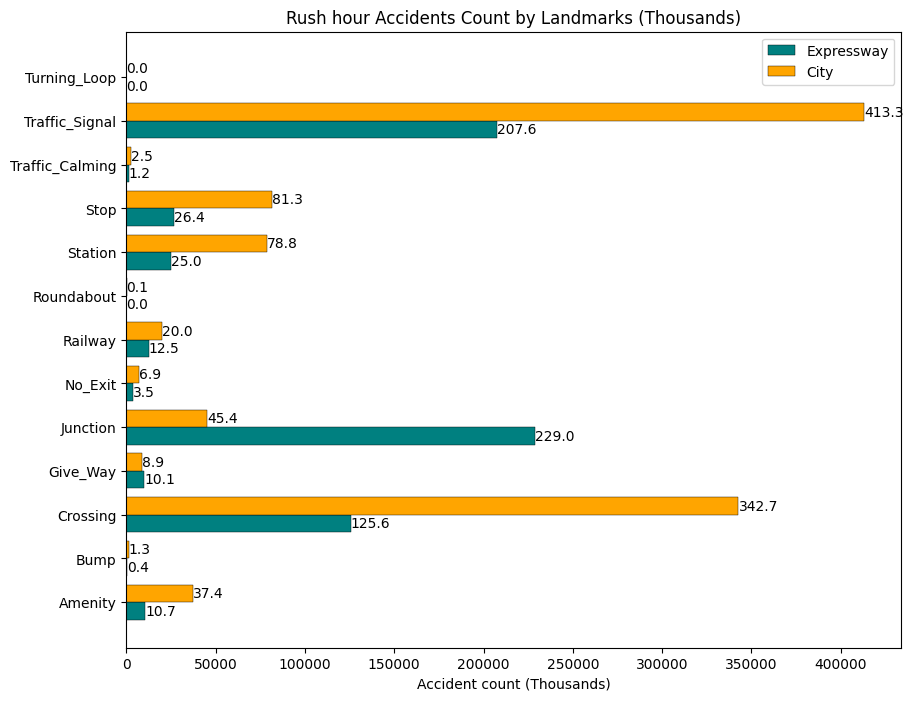

In [19]:
counts_expressway = [accident_expressway_rush_hour[x].sum(axis=0) for x in landmark_type]
counts_city = [accident_city_rush_hour[x].sum(axis=0) for x in landmark_type]

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed

# Height of each bar
bar_height = 0.4

# Set up the positions for the bars
bar_positions_expressway = np.arange(len(landmark_type))
bar_positions_city = bar_positions_expressway + bar_height

# Plotting expressway bars horizontally
bars_expressway = ax.barh(bar_positions_expressway, counts_expressway, height=bar_height, color='teal', label='Expressway', edgecolor='black', linewidth=0.3)

# Plotting city bars horizontally
bars_city = ax.barh(bar_positions_city, counts_city, height=bar_height, color='orange', label='City', edgecolor='black', linewidth=0.3)

# Set up labels and title
ax.set_yticks(bar_positions_expressway + bar_height / 2)
ax.set_yticklabels(landmark_type, ha='right')
ax.set_xlabel('Accident count (Thousands)')
ax.set_title('Rush hour Accidents Count by Landmarks (Thousands)')
ax.legend()

# Display the counts on the right of the bars
for bar, count in zip(bars_expressway, counts_expressway):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count/1000:.1f}', ha='left', va='center')

for bar, count in zip(bars_city, counts_city):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count/1000:.1f}', ha='left', va='center')

plt.show()



### Top accident hotspot during non-rush hours on weekdays

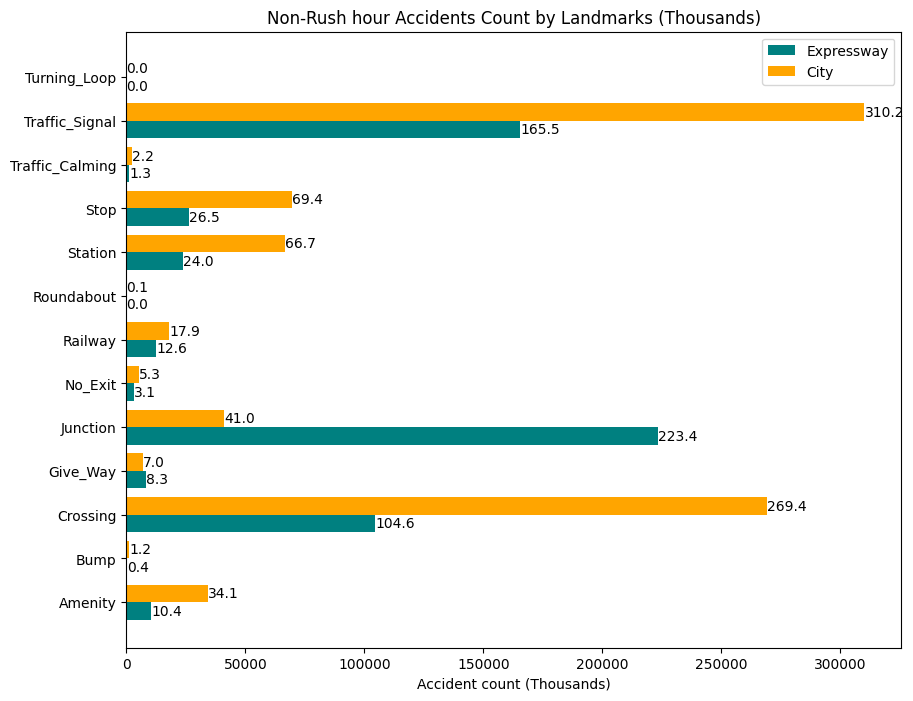

In [20]:

counts_expressway = [accident_expressway_non_rush_hour[x].sum(axis=0) for x in landmark_type]
counts_city = [accident_city_non_rush_hour[x].sum(axis=0) for x in landmark_type]

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed

# Height of each bar
bar_height = 0.4

# Set up the positions for the bars
bar_positions_expressway = np.arange(len(landmark_type))
bar_positions_city = bar_positions_expressway + bar_height

# Plotting expressway bars horizontally
bars_expressway = ax.barh(bar_positions_expressway, counts_expressway, height=bar_height, color='teal', label='Expressway')

# Plotting city bars horizontally
bars_city = ax.barh(bar_positions_city, counts_city, height=bar_height, color='orange', label='City')

# Set up labels and title
ax.set_yticks(bar_positions_expressway + bar_height / 2)
ax.set_yticklabels(landmark_type, ha='right')
ax.set_xlabel('Accident count (Thousands)')
ax.set_title('Non-Rush hour Accidents Count by Landmarks (Thousands)')
ax.legend()

# Display the counts on the right of the bars
for bar, count in zip(bars_expressway, counts_expressway):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count/1000:.1f}', ha='left', va='center')

for bar, count in zip(bars_city, counts_city):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count/1000:.1f}', ha='left', va='center')

plt.show()



By splitting the data into rush hour vs non-rush hour category, we can clearly see that accidents during rush hours period accounts for more than half of the total accidents in the USA during weekdays. We also notice, regardless of the time of day, the main hotspots of accidents on highways and cities are the same.

### Accidents based on weather condition

In [21]:
df['Weather_Condition'].value_counts().head(20)

Weather_Condition
Fair                       2520475
Mostly Cloudy              1008689
Cloudy                      808311
Clear                       799995
Partly Cloudy               691933
Overcast                    380631
Light Rain                  351022
Scattered Clouds            203548
Light Snow                  127482
Fog                          98268
Rain                         83184
Haze                         74942
Fair / Windy                 35415
Heavy Rain                   32037
Light Drizzle                22590
Thunder in the Vicinity      17385
Cloudy / Windy               16932
T-Storm                      16556
Mostly Cloudy / Windy        16475
Snow                         15267
Name: count, dtype: int64

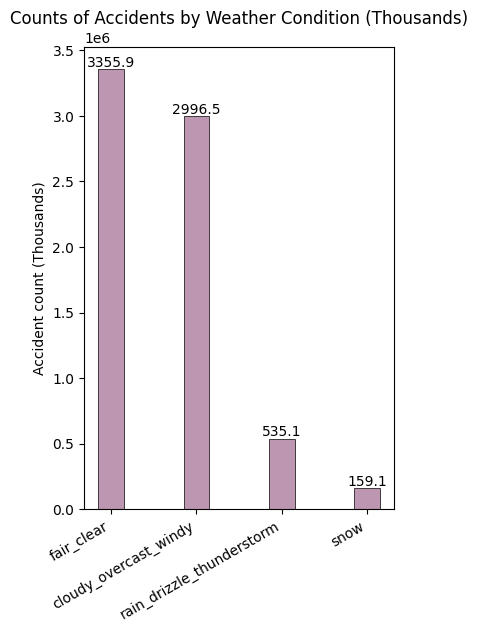

In [22]:
fair_clear = df[df['Weather_Condition'].str.contains('Fair|Clear', na=False)]['Weather_Condition'].value_counts().values.sum()
cloudy_overcast_windy = df[df['Weather_Condition'].str.contains('Cloudy|Overcast|Windy', na=False)]['Weather_Condition'].value_counts().values.sum()
rain_drizzle_thunderstorm = df[df['Weather_Condition'].str.contains('Rain|Drizzle|T-storm', na=False)]['Weather_Condition'].value_counts().values.sum()
snow = df[df['Weather_Condition'].str.contains('Snow', na=False)]['Weather_Condition'].value_counts().values.sum()

x_axis = [
    'fair_clear',
    'cloudy_overcast_windy',
    'rain_drizzle_thunderstorm',
    'snow'
]

y_axis = [
    fair_clear,
    cloudy_overcast_windy,
    rain_drizzle_thunderstorm,
    snow
]

plt.figure(figsize=(4, 6))
bars = plt.bar(x_axis, y_axis, color='#BD96B2', width=0.3, edgecolor='black', linewidth=0.5)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Accident count (Thousands)')
plt.title('Counts of Accidents by Weather Condition (Thousands)')

for bar, count in zip(bars, y_axis):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{count/1000:.1f}', ha='center', va='bottom')

plt.show()


In [35]:
total = fair_clear + cloudy_overcast_windy + rain_drizzle_thunderstorm + snow

(fair_clear + cloudy_overcast_windy) / total

print(f'Accidents percentage in ideal weather compared to the total: {(fair_clear + cloudy_overcast_windy) / total * 100}%')

Accidents percentage in ideal weather compared to the total: 93.26857972709183%


It is fair to say that severe weather has minimal impact on causing more accidents. 9 out of 10 cases of accidents happened despite having no precipitation.

### Quantitative data distribution

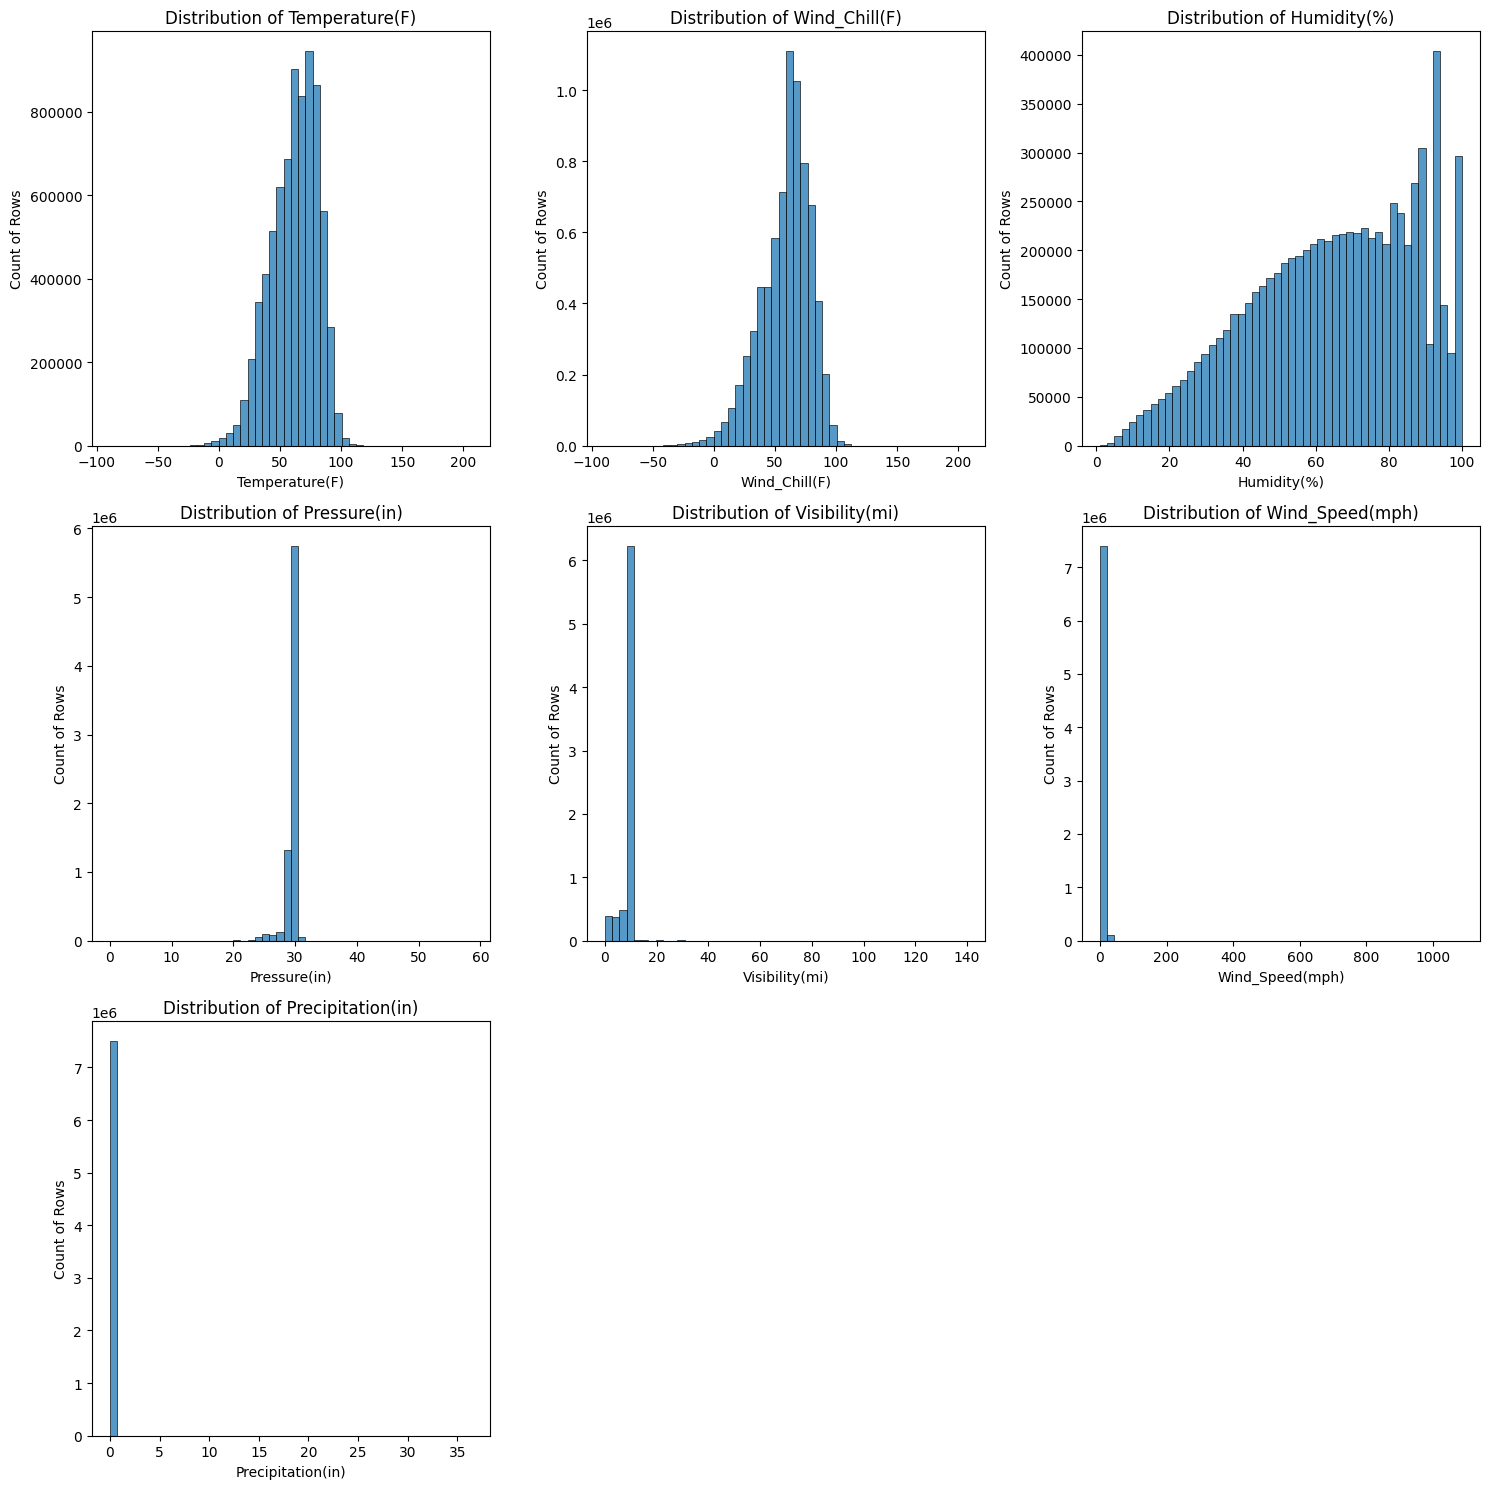

In [25]:
quant_data = [
    'Temperature(F)',
    'Wind_Chill(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Precipitation(in)'
]

fig, axes = plt.subplots(3, 3, figsize=(15,15))
axes = axes.flatten()

for i, x in enumerate(quant_data):
    sns.histplot(data=df[x], bins=50, kde=False, ax=axes[i])
    axes[i].set_xlabel(x)
    axes[i].set_ylabel('Count of Rows')
    axes[i].set_title(f'Distribution of {x}')

[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

plt.tight_layout()

plt.show()

From our histogram above, it does not show any correlation between these variables and the likelihood of accidents.
For example, in our data of over 7 million cases, the distribution of cases by temperature and pressure is fairly Gaussian. There are some severe outliers but not enough to prove that these accidents were caused by extreme temperature and pressure.

If we are to make an assumption, the hypothesis would be lower visibility, high wind speed and precipitation could have adverse effect on traffic conditions thus causing more accidents. In our histogram, that was not the case. Most of the accidents happened when visibility is great, wind speeds and precipitations are low.

The only variable which could plausibly correlate with accidents is humidity but the distribution showed inconsistent result. There is a spike in accident count between 92% - 94% humidity, however a huge fluctuation could be seen when humidity dips below 92% or rise above 94%.

All in all, the continuous variables we have is not a good predictor in explaining accidents.

### Severity of accidents distribution

In [26]:
severity_counts_expressway = all_accidents_highway['Severity'].value_counts(normalize=True) * 100
severity_counts_city = all_accidents_city['Severity'].value_counts(normalize=True) * 100


### Accident severity

,Expressway,City
Severity,,
1,0.410267,1.506153
2,69.153732,93.694478
3,27.932060,1.957943
4,2.503941,2.841425


,Severity,Location,Percentage
0,1,Expressway,0.410267
1,2,Expressway,69.153732
2,3,Expressway,27.932060
3,4,Expressway,2.503941
4,1,City,1.506153
5,2,City,93.694478
6,3,City,1.957943
7,4,City,2.841425


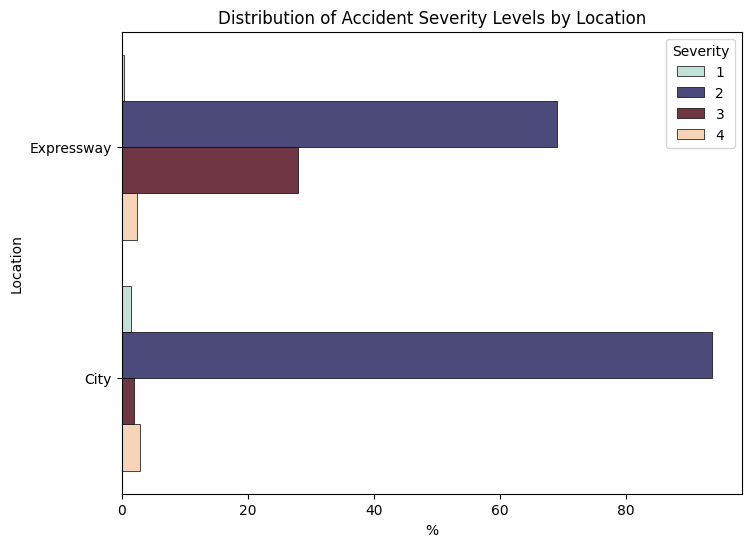

In [27]:
combined_severity_df = pd.DataFrame({
    'Expressway': severity_counts_expressway,
    'City': severity_counts_city
})

display(combined_severity_df)
combined_severity_df = combined_severity_df.reset_index()

melted_severity_df = pd.melt(
    combined_severity_df,
    id_vars='Severity',
    var_name='Location',
    value_name='Percentage'
)
display(melted_severity_df)

plt.figure(figsize=(8, 6))
sns.barplot(
    y='Location',
    x='Percentage',
    hue='Severity',
    data=melted_severity_df,
    edgecolor='black',
    linewidth=0.5,
    palette='icefire',
    orient='h'
)

# Adding labels and title
plt.xlabel('%')
plt.ylabel('Location')
plt.title('Distribution of Accident Severity Levels by Location')
plt.legend(title='Severity', loc='upper right')
plt.xticks(rotation=0)

plt.show()

### Insights from analysis so far
- Accidents increased by over 325% over a period of 7 years. That is an average of over 45% per annum

- CA, FL, TX has the highest accident nationwide, they account for 41.3% of all accidents.
- more than 2/3rds of the time accidents happen during the day
- During workdays, rush hours has the highest likelihood of accidents happening.
- We pinpointed the landmarks where accident occurs. Areas with merging traffic (such as highway junctions), oncoming traffic from the left or right (city junctions, roads with traffic signals), areas with pedestrian (pedestrian crossing, station) are areas where accidents are most likely to happen. 
- Accidents happens more often on highway than cities. The number might not be accurate due to the method of segregation using keyword
- The total number of accidents during rush hour period is greater than the number of accidents than the rest of the day combined.
- Regardless of the time of day, accident hotspots are the same
- Weather condition have minimal impact in explaining accidents.
- Accidents happened on the highway has higher severity than cities.

### Exploring further into the three states of CA, FL and TX

##### Now that we have a baseline on the general accidents pattern, let's dig deeper into the three states and see are there anomalies in their data as opposed to the nationwide average.

/var/folders/3v/nvf5sb85235fjz6fgzjnl1gr0000gn/T/ipykernel_17498/2634450685.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/3v/nvf5sb85235fjz6fgzjnl1gr0000gn/T/ipykernel_17498/2634450685.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/3v/nvf5sb85235fjz6fgzjnl1gr0000gn/T/ipykernel_17498/2634450685.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



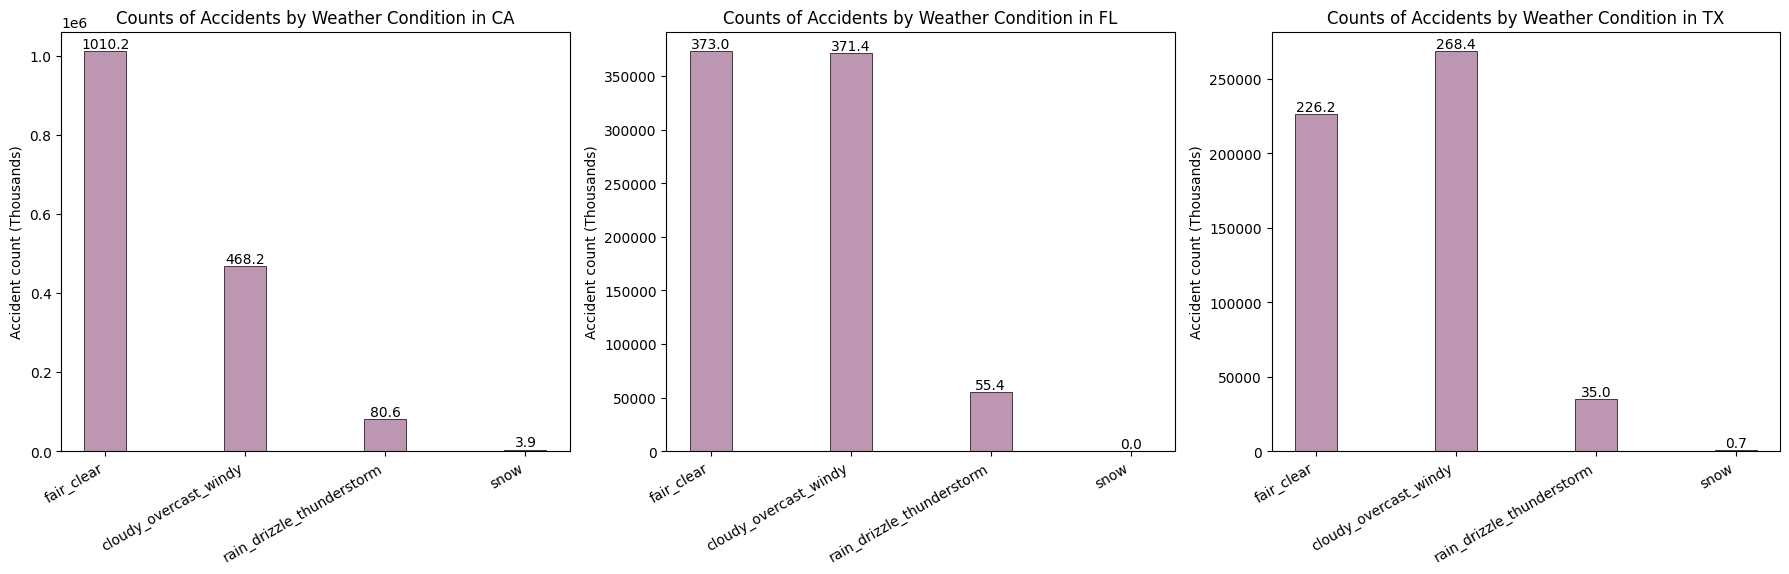

In [28]:
states = ['CA', 'FL', 'TX']

# Create the main figure with subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, state in enumerate(states):
    fair_clear = df[(df['Weather_Condition'].str.contains('Fair|Clear', na=False)) & (df['State'] == state)]['Weather_Condition'].value_counts().values.sum()
    cloudy_overcast_windy = df[(df['Weather_Condition'].str.contains('Cloudy|Overcast|Windy', na=False)) & (df['State'] == state)]['Weather_Condition'].value_counts().values.sum()
    rain_drizzle_thunderstorm = df[(df['Weather_Condition'].str.contains('Rain|Drizzle|T-storm', na=False)) & (df['State'] == state)]['Weather_Condition'].value_counts().values.sum()
    snow = df[(df['Weather_Condition'].str.contains('Snow', na=False)) & (df['State'] == state)]['Weather_Condition'].value_counts().values.sum()

    x_axis = [
        'fair_clear',
        'cloudy_overcast_windy',
        'rain_drizzle_thunderstorm',
        'snow'
    ]

    y_axis = [
        fair_clear,
        cloudy_overcast_windy,
        rain_drizzle_thunderstorm,
        snow
    ]

    # Plot bar chart in the current subplot
    bars = axes[i].bar(x_axis, y_axis, color='#BD96B2', width=0.3, edgecolor='black', linewidth=0.5)

    axes[i].set_xticklabels(x_axis, rotation=30, ha='right')
    axes[i].set_ylabel('Accident count (Thousands)')
    axes[i].set_title(f'Counts of Accidents by Weather Condition in {state}')

    # Add annotations on top of each bar
    for bar, count in zip(bars, y_axis):
        axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                     f'{count/1000:.1f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()


The weather conditions in CA, FL and TX is not significantly different compared to nationwide data.

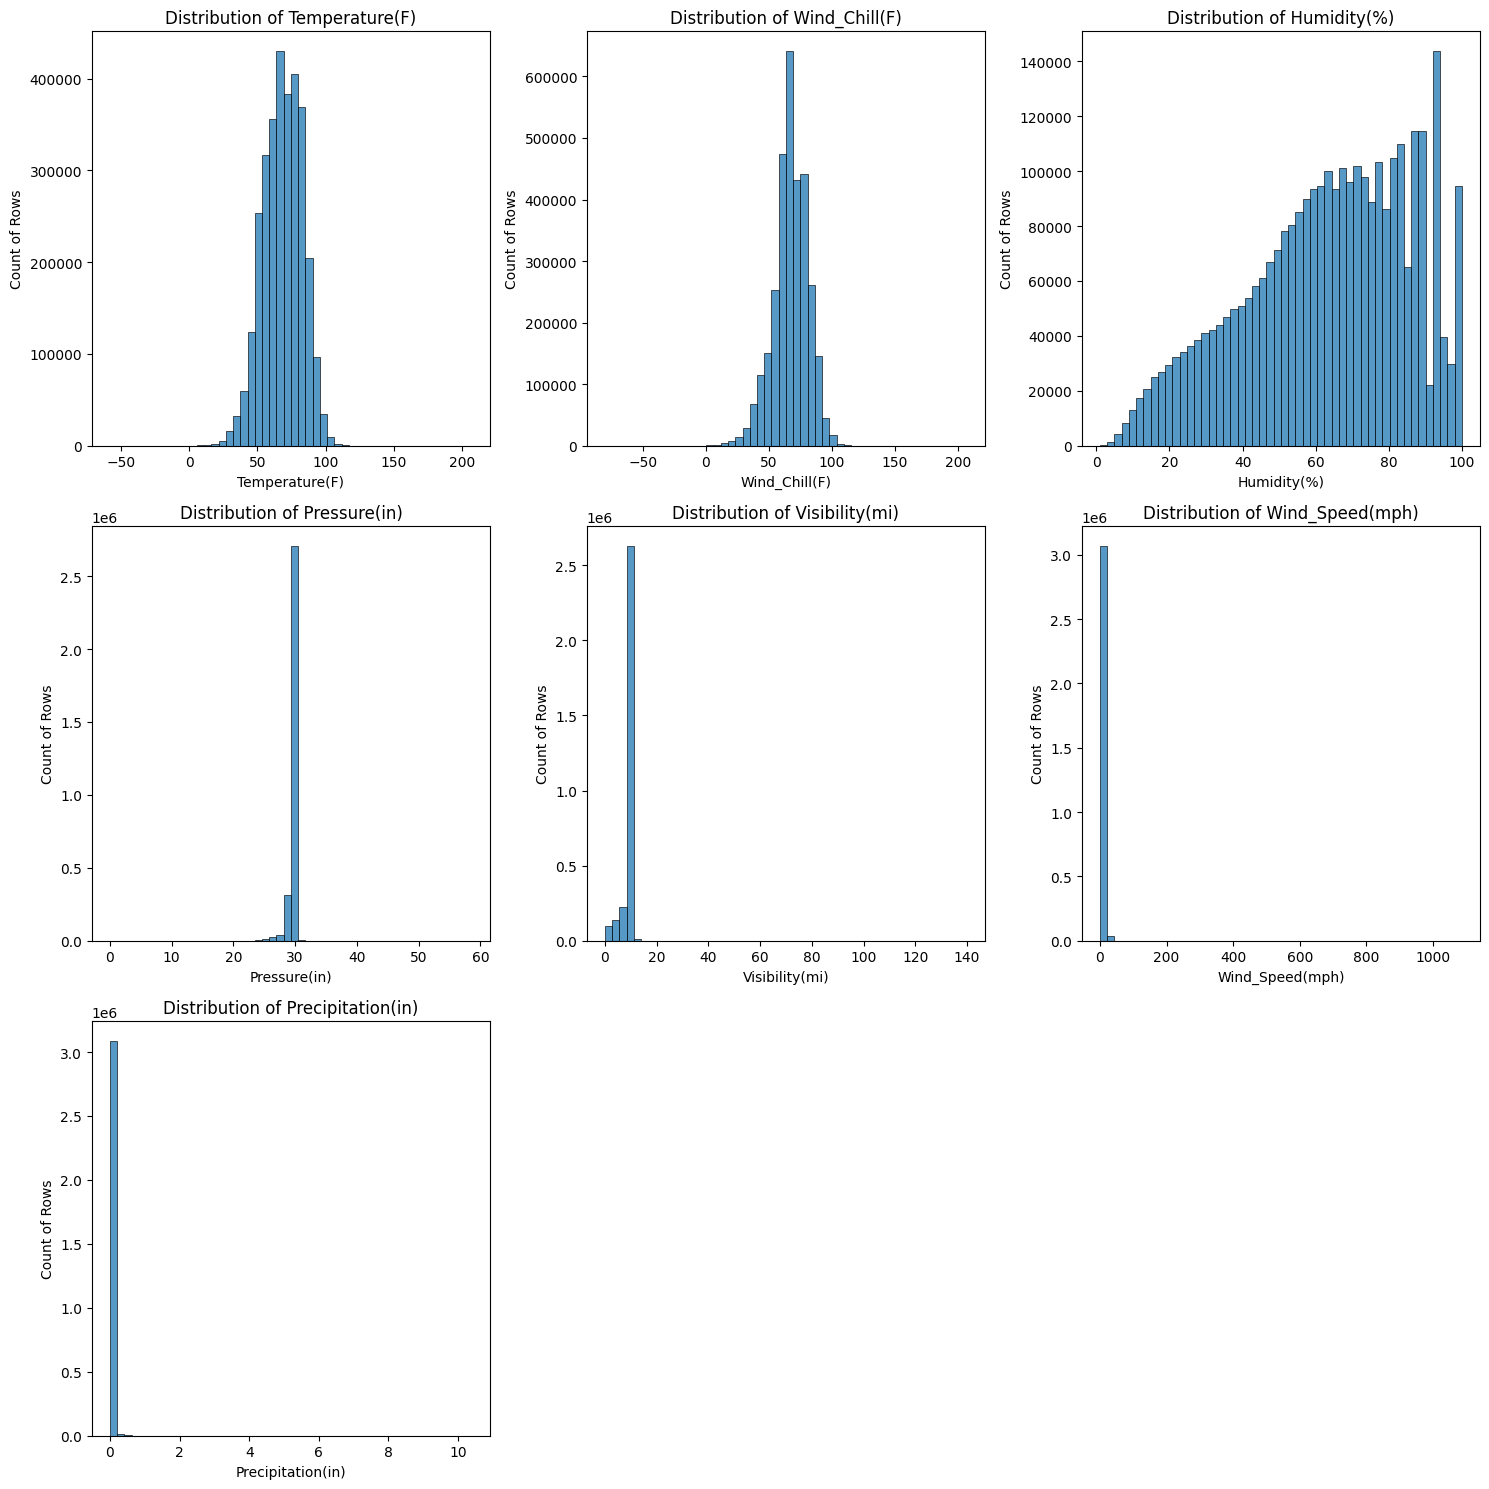

In [29]:
quant_data = [
    'Temperature(F)',
    'Wind_Chill(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Precipitation(in)'
]

fig, axes = plt.subplots(3, 3, figsize=(15,15))
axes = axes.flatten()

for i, x in enumerate(quant_data):
    sns.histplot(data=df[(df['State'] == 'FL') | (df['State'] == 'CA') | (df['State'] == 'TX')][x], bins=50, kde=False, ax=axes[i])
    axes[i].set_xlabel(x)
    axes[i].set_ylabel('Count of Rows')
    axes[i].set_title(f'Distribution of {x}')

[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

plt.tight_layout()

plt.show()

Continuous data points are also similar to nationwide data.

In [30]:
landmark_type = [
    'Amenity',
    'Bump',
    'Crossing',
    'Give_Way',
    'Junction', 
    'No_Exit', 
    'Railway', 
    'Roundabout', 
    'Station', 
    'Stop',
    'Traffic_Calming', 
    'Traffic_Signal'
]

total_counts = [df[x].sum(axis=0) for x in landmark_type]
ca_fl_tx_counts = [df[(df['State'] == 'FL') | (df['State'] == 'CA') | (df['State'] == 'TX')][x].sum(axis=0) for x in landmark_type]

result_df = pd.DataFrame({
    'Landmark':landmark_type, 
    'Total Percentage': total_counts, 
    'Three States Percentage': ca_fl_tx_counts
})

result_df['Total Percentage'] = (result_df['Total Percentage'] / result_df['Total Percentage'].sum()) * 100
result_df['Three States Percentage'] = (result_df['Three States Percentage'] / result_df['Three States Percentage'].sum()) * 100

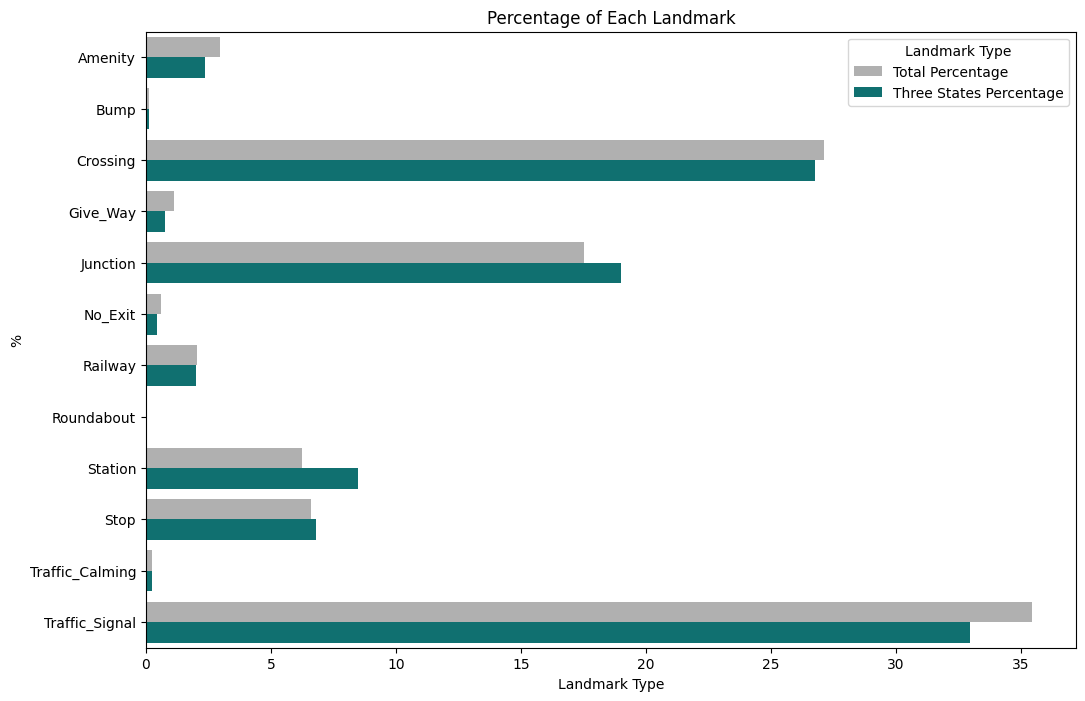

In [31]:
melted_df = result_df.melt(id_vars='Landmark', var_name='Landmark Type', value_name='Percentage')

plt.figure(figsize=(12, 8))

unique_landmarks = melted_df['Landmark Type'].unique()

custom_palette = ['#B0B0B0' if x == 'Total Percentage' else 'teal' for x in unique_landmarks]

sns.barplot(y='Landmark', x='Percentage', hue='Landmark Type', data=melted_df, palette=custom_palette, orient='h')

plt.xlabel('Landmark Type')
plt.ylabel('%')
plt.title('Percentage of Each Landmark')
plt.legend(title='Landmark Type', loc='upper right')

plt.show()

These three states do not show any significant difference in accidents prone landmarks like traffic signals, crossings or junctions. In fact they are very similar to nationwide distribution.

Another possible explanation could be the population for each state. We are hypothesising these three states should have a population percentage close to the percentage of accidents against nationwide. Which is about:
- California - 22.24%
- Florida - 11.48%
- Texas - 7.62%

A quick web search got us the census data for 2020. Below are the population percentage against US total:
- California - 11.8%
- Florida - 6.43%
- Texas - 8.7%

The greater the population in a specific city, the greater the traffic count, and number of accidents increases, rightly so. That being said, accident rates in California and Florida are alarmingly high for the percentage population living in that state.

### Answering our questions
- What are the main causes of accidents?  
>We cannot conclude the main 'causes' of accident but we can definitely pinpoint the landmarks where accident occurs, they also differ depending on the location of accident. Which we have categorised into 'City' vs 'Highway' accident.
> If accidents happen in the city, the analysis points towards the hotspots with highest number of accidents such as areas with traffic lights, pedestrian crossing, area with stop sign, and area with a station nearby, in that order.
> On the highway, accidents hotspots are near junctions

- The highest number of accidents by city and state
> From our dataset, the top 3 states we identified are California, Florida and Texas. These three states accounts for 41.34% of all accidents in the United States in a total time span of 7 years. 

- What hours of day are accidents most likely to happen
> The hours of day with the highest likelihood of accidents also depends on the day of week. During the weekdays, accidents most likely occur during morning rush hours from 6am to 9 am and evening rush hours from 3pm to 6pm.
> During the weekends however, noon to evening is when accidents most likely happen, albeit with lower number compared to weekdays.

### Conclusion: What is the biggest factor causing accidents in the US and what action shall we take to bring accidents rate down?
As we've mentioned in our prior question, we can identify the landmarks but not the cause of accidents. Looking at the top accident hotspots, regardless of accident location, we can generalise that areas with merging traffic (such as highway junctions), oncoming traffic from the left or right (city junctions, roads with traffic signals), areas with pedestrian (pedestrian crossing, station) are areas where accidents are most likely to happen. 

If the land authority plans to reduce traffic accident, these areas could be the main point of interest to come up with a course of action.